# Gradient Descent Variants

In [4]:
import numpy as np
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='darkgrid')

In [22]:
X, y = make_regression(n_samples=100, n_features=1, noise=1, random_state=18)

In [23]:
X_ = np.c_[np.ones(X.shape), X] # adding bias term 

## Batch Gradient Descent <br>

### $$\theta = \theta - \alpha \cdot \nabla_\theta J( \theta)$$

In [36]:
rng = np.random.RandomState(32) # seeding a prng for reproducible results
y = y.reshape(100,1)
n = X.shape[0]
alpha = 0.1 # learning rate
num_iterations = 100
bgd_path = []
h = 0.01 
theta = rng.randn(2,1) # random initialization of the parameters
cost = []
gradients = 1

for iteration in range(num_iterations):
    while np.all(abs(gradients) > 0.001):
        gradients = 2/n * X_.T.dot(X_.dot(theta) - y)
        cost.append(((X_.dot(theta) - y)**2).sum()/n)
        theta = theta - alpha * gradients
        bgd_path.append(theta)

### Convergence of Batch GD

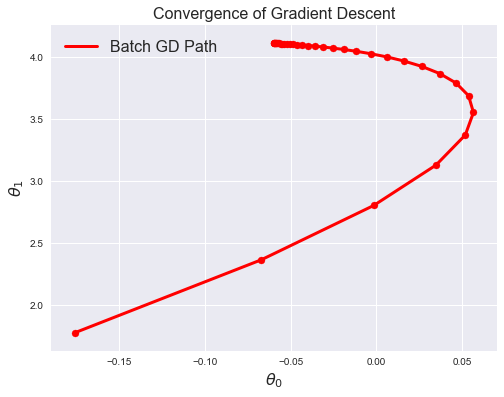

In [37]:
theta0 = [thetas[0] for thetas in bgd_path]
theta1 = [thetas[1] for thetas in bgd_path]

fig, ax = plt.subplots(figsize=(8,6))
ax.plot(theta0, theta1, c='r', linewidth=3, label="Batch GD Path")
ax.scatter(theta0, theta1, c='r')
ax.set_xlabel(r"$\theta_{0}$", fontsize=16)
ax.set_ylabel(r"$\theta_{1}$", fontsize=16)
ax.set_title('Convergence of Gradient Descent', fontsize=16)
ax.legend(loc="upper left", prop={'size': 16})

In [38]:
bgd_converged_iter = iteration
bgd_cost = cost[:bgd_converged_iter]

## Stochastic Gradient Descent <br>

### $$\theta = \theta - \alpha \cdot \nabla_{\theta} J\big(\theta; \big\{ x^{(i)}, y^{(i)} \big\} \big)$$ 

In [42]:
rng = np.random.RandomState(32)
alpha = 0.1
theta = rng.randn(2,1)
num_epochs = 50
J = []
data = np.c_[X_, y]
n = data.shape[0] 
sgd_path = []
initial_cost = ((((X_.dot(theta) - y)**2).sum())/n)
J.append(initial_cost)
grads = []

for epoch in range(num_epochs):
    rng.shuffle(data)
    for i in range(n):
        x_i = data[i,:-1].reshape(1,2)
        y_i = data[i, -1:]
        gradients = 2/n * x_i.T.dot(x_i.dot(theta) - y_i)
        theta = theta - alpha * gradients
        sgd_path.append(theta)
    grads.append(gradients)
    cost = ((((X_.dot(theta) - y)**2).sum())/n)
    J.append(cost)

In [43]:
for sgd_iter, cost in enumerate(J):
    if cost < 1.0824:
        sgd_converged_iter = sgd_iter
        break
sgd_cost = J[:sgd_converged_iter]

### Convergence of SGD

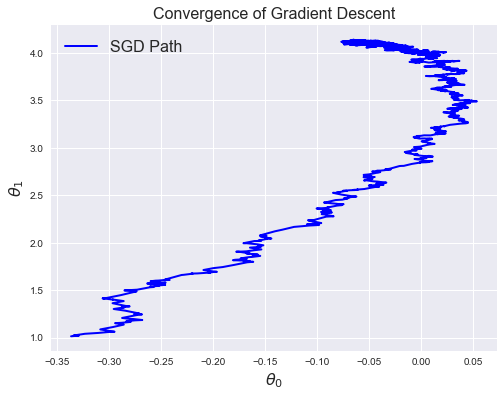

In [44]:
theta0 = [thetas[0] for thetas in sgd_path]
theta1 = [thetas[1] for thetas in sgd_path]

fig, ax = plt.subplots(figsize=(8,6))
ax.plot(theta0, theta1, c='b', linewidth=2, label="SGD Path")
ax.set_xlabel(r"$\theta_{0}$", fontsize=16)
ax.set_ylabel(r"$\theta_{1}$", fontsize=16)
ax.set_title('Convergence of Gradient Descent', fontsize=16)
ax.legend(loc="upper left", prop={'size': 16})

## Mini-Batch Gradient Descent <br>

### $$\theta = \theta - \alpha \cdot \nabla_{\theta} J\big(\theta; \big\{ x^{(i:i+k)}, y^{(i:i+k)} \big\} \big)$$


In [45]:
rng = np.random.RandomState(32)
theta = rng.randn(2,1)
num_epochs = 30
J = []
data = np.c_[X_, y]
n = data.shape[0]
k = 20
mbgd_path = []
initial_cost = ((((X_.dot(theta) - y)**2).sum())/n)
J.append(initial_cost)

for epoch in range(num_epochs):
    rng.shuffle(data)
    for i in range(0, n, k):
        x_i = data[i:i+k,:-1].reshape(k,2)
        y_i = data[i:i+k, -1:]
        gradients = 2/n * x_i.T.dot(x_i.dot(theta) - y_i)
        theta = theta - alpha * gradients
        mbgd_path.append(theta)
    cost = ((((X_.dot(theta) - y)**2).sum())/n)
    J.append(cost)

### Convergence of Mini-Batch GD

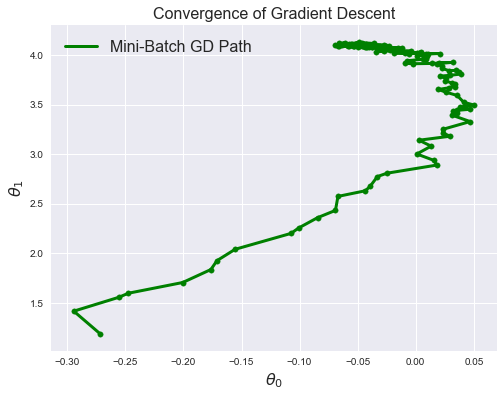

In [46]:
sns.set(style='darkgrid')
theta0 = [thetas[0] for thetas in mbgd_path]
theta1 = [thetas[1] for thetas in mbgd_path]

fig, ax = plt.subplots(figsize=(8,6))
ax.plot(theta0, theta1, c='g', linewidth=3, label="Mini-Batch GD Path")
ax.scatter(theta0, theta1, c='g', s=30)
ax.set_xlabel(r"$\theta_{0}$", fontsize=16)
ax.set_ylabel(r"$\theta_{1}$", fontsize=16)
ax.set_title('Convergence of Gradient Descent', fontsize=16)
ax.legend(loc="upper left", prop={'size': 16})

In [18]:
for mbgd_iter, cost in enumerate(J):
    if cost < 1.0824:
        mbgd_converged_iter = mbgd_iter
        break
mbgd_cost = J[:mbgd_converged_iter]

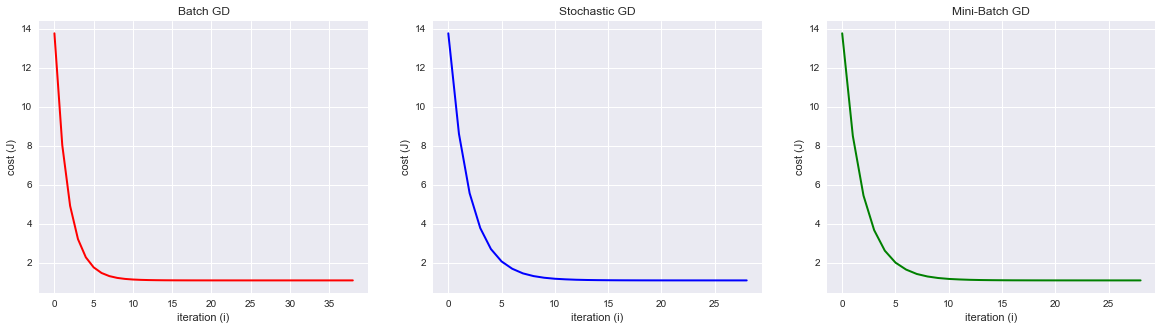

In [19]:
iterations = [bgd_converged_iter, sgd_converged_iter, mbgd_converged_iter]
costs = [bgd_cost, sgd_cost, mbgd_cost]
colors = ['r', 'b', 'g']
titles = ['Batch GD', 'Stochastic GD', 'Mini-Batch GD']

fig, axes = plt.subplots(1 ,3, figsize=(20,5))

for iteration, cost, ax, color, title in zip(iterations, costs, axes.flat, colors, titles):
    ax.plot(np.arange(iteration), cost, c=color, linewidth=2)
    ax.set(xlabel="iteration (i)", ylabel="cost (J)", title=title)